# Spectral Analysis

Spectral analysis is the analyis of data in the frequency domain, as opposed to the time domain. It is an important tool for time series analysis because it allows us to explore our data in new ways and expose features that wouldn't be available from just a time-focused view. 

To begin our discussion on Spectral Analysis, let's first talk about the type of time data which they are most applicable, which are **periodic functions**.


## Periodic Functions
Some time series are periodic, meaning that they contain a repeating pattern. A function is said be to be periodic if there exists a period $p$ such that for all $x$:

$ f(x) = f(x + kp) $, where $k$ can be any integer.

An example of periodic functions are the sine and cosine functions. The sine and cosine waves $A \sin{(\omega x)}$ and $A \cos{(\omega x)}$ are time series with both having periods $p = 2\frac{\pi}{\omega}$. $\omega$ is the *angular frequency* of the sine and cosine functions while $A$ is the *amplitude*.

Below we plot a 3hz sine and 5hz cosine functions with amplitudes of 1. Both these functions are also stationary time series.
<!-- both with angular frequencies of 0.5 and amplitude of 1, giving both a period of $\frac{2\pi}{0.5} = 4\pi$ -->

In [1]:
import numpy as np
import pandas as pd
import scipy.fft as fft
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as scp
import scipy.signal as signal
import pywt
import os
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import ccf

def generate_sine_wave(amp, freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration)
    frequencies = x * freq
    y = amp * np.sin((2 * np.pi) * frequencies)
    return x, y

def generate_cosine_wave(amp, freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration)
    frequencies = x * freq
    y = amp * np.cos((2 * np.pi) * frequencies)
    return x, y



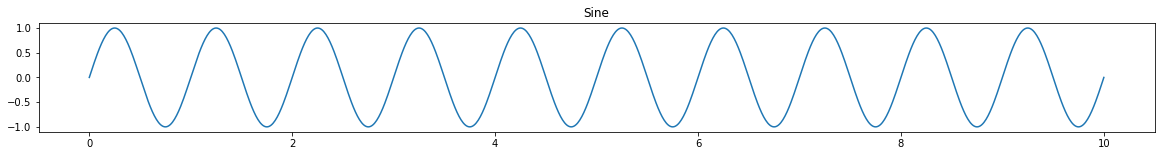

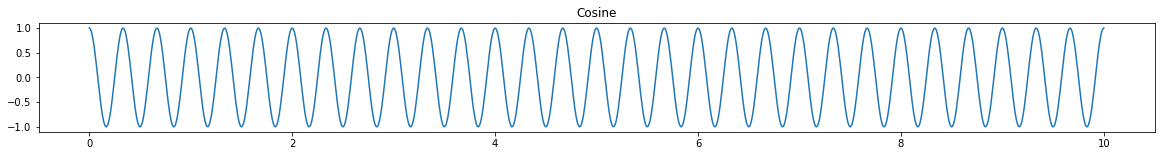

In [2]:
# Plot a sine a 1 hertz sine and 3 hertz cosine waves that lasts for 10 seconds
sine_x, sine_y = generate_sine_wave(1, 1, 100, 10)
plt.figure(figsize=(20,2))
plt.plot(sine_x, sine_y)
plt.title("Sine")
plt.show()

cosine_x, cosine_y = generate_cosine_wave(1, 3, 100, 10)
plt.figure(figsize=(20,2))
plt.plot(cosine_x, cosine_y)
plt.title("Cosine")
plt.show()


### Fourier's theorem
The sine and cosine functions are key building blocks in the study of periodic functions due to **Fourier's thorem**, which states that any periodic function $f(x)$ with period $p$ maybe be written as a sum of (possibly infinite) sine and cosine functions. This sum is the Fourier series with the equation:

$f(x) = \sum_{r=0}^{\infty}[a_r\cos{(2\pi rx/p)} + b_r\sin{(2\pi rx / p)}]$, where $a_0, a_1, a_2,...,b_0, b_1, b_2, ...$ are constants.

Each step in the summation may be described as:

* The first term ($r = 0$) is a constant.
* The second term ($r = 1$) are sine and cosine waves with the basic period $p$.
* The third term ($r = 2$) are sine and cosine waves with period $p / 2$.
* The fourth term ($r = 3$) are sine and cosine waves with perio $p / 3$.
* And so on...

## Fourier Transform

The Fourier Transform is one of the most important tools in spectral analysis. It decomposes a time series function into frequencies based on the waves that make up the function. One requirement to be able to use the Fourier transform is that the time series should be **stationary**.

The Fourier Transform is defined as:

$ \hat{f}(\xi) = \int_{\infty}^{\infty} f(x) e^{-2\pi ix\xi}dx$

As an example, let's run the the Fourier Transform on the sine and cosine waves earlier. Scipy provides a *fft* module which we can easily use (https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html).

Sine wave peak at: 1.0 Hz
Cosine wave peak at: 3.0 Hz


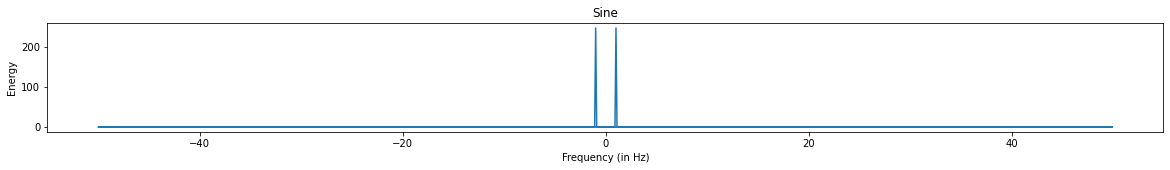

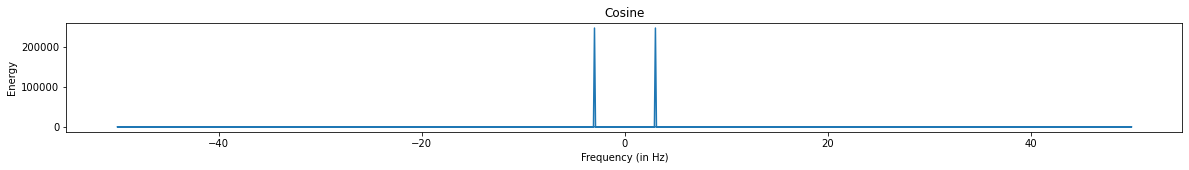

In [3]:
sine_y_ft = fft.fft(sine_y)
sine_freqs = fft.fftfreq(sine_x.shape[-1])*100
plt.figure(figsize=(20, 2))
plt.plot(sine_freqs, sine_y_ft.real**2)
plt.ylabel('Energy')
plt.xlabel('Frequency (in Hz)')
plt.title('Sine')
print('Sine wave peak at:', np.argmax(sine_y_ft.real**2)/10, 'Hz')

cosine_y_ft = fft.fft(cosine_y)
cosine_freqs = fft.fftfreq(cosine_x.shape[-1])*100
plt.figure(figsize=(20, 2))
plt.plot(cosine_freqs, cosine_y_ft.real**2)
plt.ylabel('Energy')
plt.xlabel('Frequency (in Hz)')
plt.title('Cosine')
print('Cosine wave peak at:', np.argmax(cosine_y_ft.real**2)/10, 'Hz')

Running the Fourier transform on our sine and cosine waves gives us the frequency spectrum of each. As you can see, it shows us that the energy for the sine wave peaks at 1hz for the sine wave and 3 hz for the cosine wave, which are the actual frequencies of both. We have succesfully transformed our sine and cosine functions and switched them from the *time domain* into the *frequency domain*.

Next, let's look at a few use cases where it is advantageous to look at our data in the frequency domain.


### Fourier Inversion Theorem
One powerful attribute of a Fourier transform is that it is *reversible*. Assuming a "well behaved function", if we are given just the output values of the Fourier transform, we can recover the original time series data. This is known as the **Fourier inversion theorem**. 

Let's try that with our sine and cosine functions, using the output from their Fourier transforms. Scipy's *fft* module helpfully provides the **ifft** (https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.ifft.html) function for us to simply use:

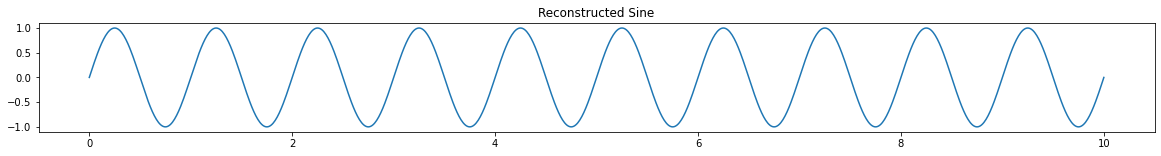

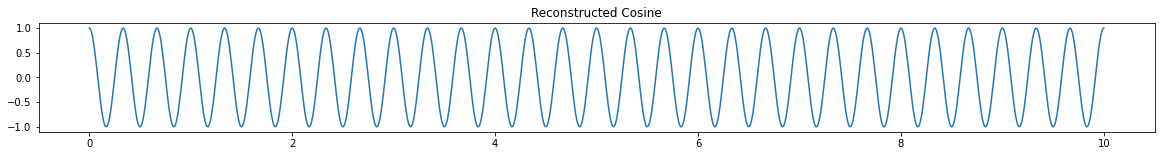

In [4]:
orig_sine_y = fft.ifft(sine_y_ft).real
plt.figure(figsize=(20, 2))
plt.plot(sine_x, orig_sine_y)
plt.title("Reconstructed Sine")
plt.show()

orig_cosine_y = fft.ifft(cosine_y_ft).real
plt.figure(figsize=(20, 2))
plt.title("Reconstructed Cosine")
plt.plot(cosine_x, orig_cosine_y)
plt.show()

As can be seen, we have successfully recovered our original sine and cosine waving functions using only their Fourier transform values!

### Fourier Transform on Multiple Frequencies

Another use case of the Fourier transform is to help us decompose signals that are a combination of multiple frequencies. As an example, let's first combine our sine and cosine waves by adding them together and making a new periodic time series:

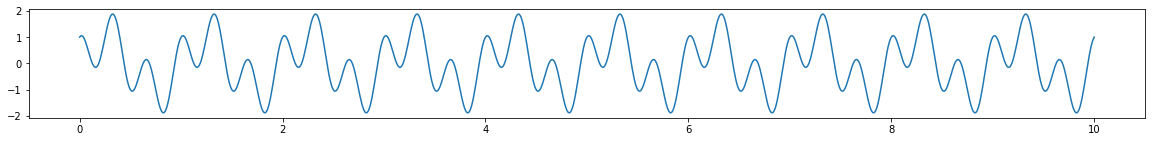

In [5]:
mixed_y = sine_y + cosine_y
mixed_x = sine_x #can use either x

plt.figure(figsize=(20, 2))
plt.plot(mixed_x, mixed_y);

As can be seen this new signal is still stationary. Let's then run the Fourier transform on this mixed signal and see what we get:

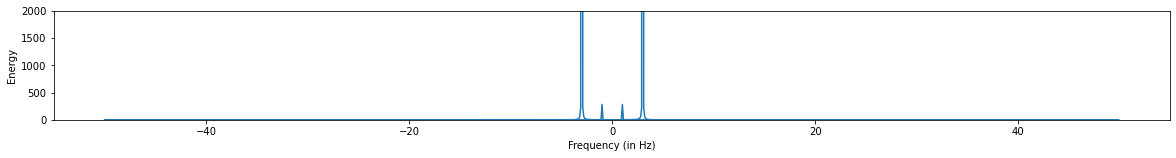

Peaks at: [1. 3.]


In [6]:
mixed_y_ft = fft.fft(mixed_y)
mixed_freqs = fft.fftfreq(mixed_x.shape[-1])*100
plt.figure(figsize=(20, 2))
plt.plot(mixed_freqs, mixed_y_ft.real**2)
plt.ylabel('Energy')
plt.xlabel('Frequency (in Hz)')
plt.ylim((0,2000)) #cut because of difference in energy scaling
plt.show()
peaks = signal.find_peaks(mixed_y_ft.real**2)
peak_vals = peaks[0][:len(peaks[0])//2]/10
print('Peaks at:', peak_vals)

Running the Fourier transform on the mixed data gives us back the 2 frequencies that make it up! This is a powerful tool that can help us makese sense of complicated datasets.

### Filtering using Fourier Transform

Another use of the Fourier transform is to help us to filter out noise from our time series. Noise is a fact of life for most measurment data, and we need to come up with tools to remove noise or make our models robust to them.

To show how we can remove noise and clean our data usin the Fourier transform, let's start by taking our cosine wave earlier and adding a random gaussian noise into it:

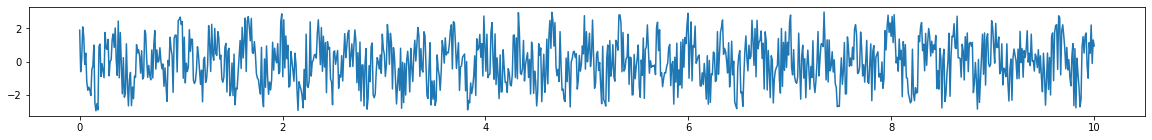

In [7]:
noise = np.random.uniform(-2,2, len(cosine_y))
noisy_y = cosine_y + noise
noisy_x = cosine_x
plt.figure(figsize=(20,2))

plt.plot(noisy_x, noisy_y)
plt.show()

The noise has definitely added a lot of color into our cosine wave. While it still looks stationary, there are local peaks everywhere, and the actual peaks of the wave have slightly different values compared to the uniform -1 and 1 in the clean cosine wave.

So how can we use Fourier transform to clean this noisy signal up? First let's run this wave through the Fourier transform and see what we get:

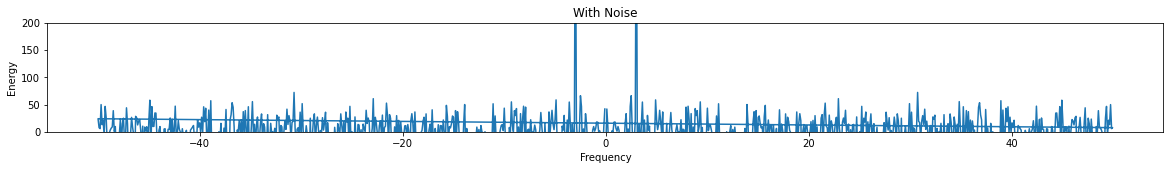

In [8]:
noisy_y_ft = scp.fft.fft(noisy_y)
noisy_freqs = scp.fft.fftfreq(noisy_x.shape[-1])*100

plt.figure(figsize=(20, 2))
plt.plot(noisy_freqs, noisy_y_ft.real)
plt.ylabel('Energy')
plt.xlabel('Frequency');
plt.ylim((0,200))
plt.title("With Noise")
plt.show()


We can see the effects of the noise on the Fourier transform. There are now energy in all over the frequencies, instead of a simple and clean distribution that we had in our non-noisy wave.

However we can see that some frequencies are stronger than other, paricularly the frequency of of our original signal. From here we can set a minimum threshold and then disregard frequencies that are less than the threashold! Let's do that for this noisy Fourier transform.

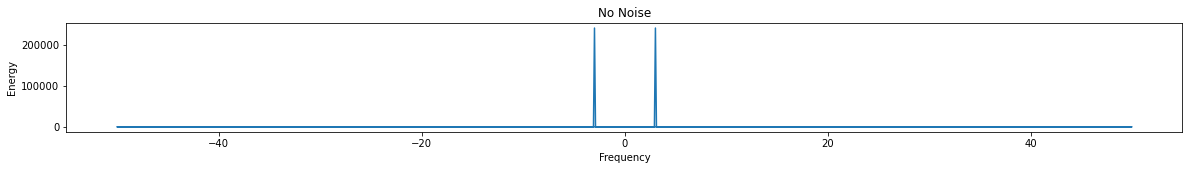

In [9]:

#threshold set at 200 after eyeballing FT plot.
no_noise_y_ft = [0 if y < 200 else y for y in noisy_y_ft]
plt.figure(figsize=(20, 2))
plt.plot(noisy_freqs, [y ** 2 for y in no_noise_y_ft])
plt.ylabel('Energy')
plt.xlabel('Frequency');
plt.title("No Noise")
plt.show()

Now that we have this cleaned up Fourier transform, let's run the Inverse Fourier Transform on it:

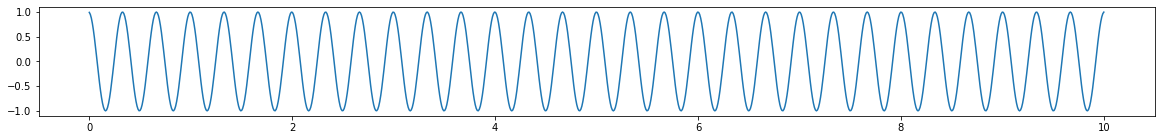

In [10]:
plt.subplots(figsize=(20, 2))
no_noise_y = scp.fft.ifft(no_noise_y_ft)
plt.plot(noisy_x, no_noise_y.real);

We're able to get back our original non-noisy cosine wave! That is how we can use the Fourier transform to remove noise in our data.

## Cross Correlation

Another spectral analysis technique is cross correlation. Normally cross correlation is used in the time domain, but it is also related to spectral density. One way we can use cross correlation is to help us find out if two periodic sequences a "lagged" versions of each other, and how much the lag is.

To show this, let's generate a new cosine wave but this time with the same frequency and different amplitude as our sine wave:

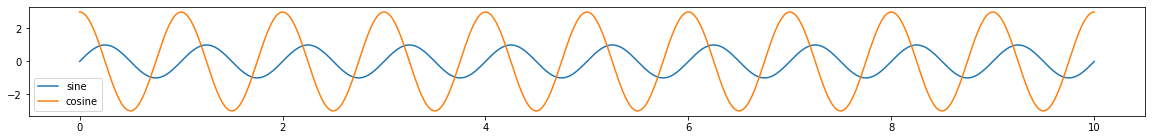

In [11]:
new_cosine_x, new_cosine_y = generate_cosine_wave(3, 1, 100, 10)

plt.figure(figsize=(20,2))
plt.plot(sine_x, sine_y, label="sine")
plt.plot(new_cosine_x, new_cosine_y, label="cosine")
plt.legend()
plt.show()


A sine and cosine waves of the same frequencies are practically the same wave but "time-shifted" against each other. From eyeballing, the difference seems to be somewhere between 0.1 to 0.5 seconds.

Now let's use cross correlation to find the exact value of the lag. Python has a **ccf** function in its *statsmodels* library that we can use (https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.ccf.html).

Maximum at: 0.25 seconds


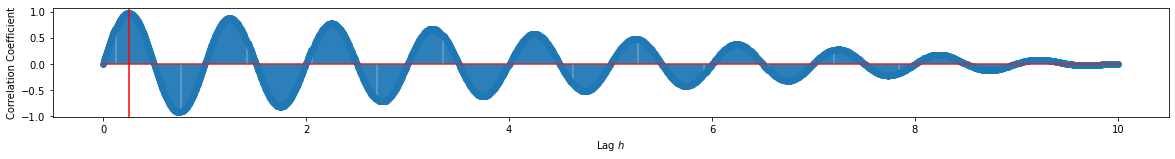

In [12]:
ccf_sine_cosine = ccf(sine_y, new_cosine_y, adjusted=False)
plt.figure(figsize=(20,2))
plt.ylabel('Correlation Coefficient')
plt.xlabel('Lag $h$')
plt.stem(np.linspace(0, 10, 1000), ccf_sine_cosine)
peak = np.argmax(ccf_sine_cosine)/100
plt.axvline(peak, c='r')
print('Maximum at:', peak, 'seconds')

plt.show()


The exact lag between our sine and cosine functions is 0.25 seconds.

**Autocorrelation** is a special case of cross correlation, wherein you correlate a signal with a lagged version of itself. This is related to spectral analysis through the Power Spectral Density, which is the Fourier transform of the autocorrelation.

### Power Spectral Density

The Power Spectral Density is closely related to the Fourier transform in that it also describes the frequency spectrum of a signal. But in addition it also calculates the power distribution at each frequency. The locations of the peaks in the frequency spectrum will be the same as in the Fourier transform, but the height and width of the peaks will be different. The surface below the peaks corresponds with the power distribution at that frequency.

## Limitations of the Fourier Transform

When we use the Fourier transform we are switching our time series from the time domain into solely the frequency domain. In this domain there are time-specific information that we lose along the way.

As an example, let's combine our sine and cosine functions once again, but instead of adding them let's concatenate them:

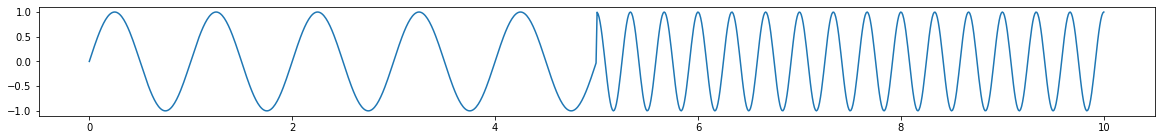

In [13]:
concat_y = np.concatenate([sine_y[0:500], cosine_y[500:1000]])
concat_x = sine_x #can use either x

plt.figure(figsize=(20,2))
plt.plot(sine_x, concat_y)
plt.show()

Now let's see what we happens when we run the Fourier transform on our concatenated wave and compare it with the Fourier transform of the mixed wave:

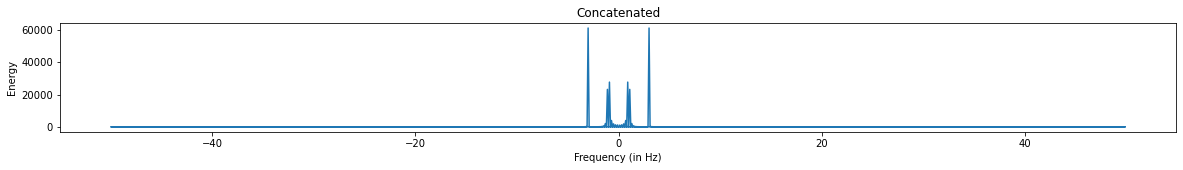

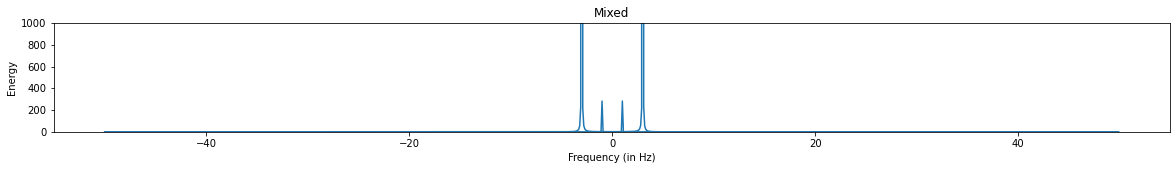

In [14]:
concat_y_ft = fft.fft(concat_y)
concat_freqs = fft.fftfreq(concat_x.shape[-1])*100
plt.figure(figsize=(20, 2))
plt.plot(concat_freqs, concat_y_ft.real**2)
plt.title('Concatenated')
plt.ylabel('Energy')
plt.xlabel('Frequency (in Hz)')
plt.show()
concat_peaks = signal.find_peaks(concat_y_ft.real**2)
concat_peak_vals = concat_peaks[0][:len(concat_peaks[0])//2]/10

plt.figure(figsize=(20, 2))
plt.plot(mixed_freqs, mixed_y_ft.real**2)
plt.title('Mixed')
plt.ylim((0,1000))
plt.ylabel('Energy')
plt.xlabel('Frequency (in Hz)')
plt.show()

Their fourier transforms look relatively the same! We were able to retrieve the same info that our time series
contain both 1h and 3hz waves, but we cannot easily tell by looking at the Fourier transforms where in the time series these waves appear, and whether they were just concatenated or added up. This is mainly because the Fourier transform deals solely on the frequency and almost none in the time domain.

There are various techniques to improve the Fourier transform to account for time periods, one of these being the **Short Time Fourier Transform**. In this method the time series is split into several equal windows and the the Fourier transform is applied on each one. The challenge of this method is that we have to find an optimal balance in window size. The smaller the window the more accurate information we will have about where the frequency occured in the time series, but less information about the frequency itself. The larger the window the more information we will have about the frequency itself but less information about the time. This is the *uncertainty principle* of the Fourier transform.

## Wavelet Transform

To incorporate time into our spectral analysis, a better method is the **Wavelet transform**. Mathematically the formula is:

$ X_w(a,b) = \frac{1}{\sqrt{|a|}} \int^{\infty}_{-\infty} x(t)\psi(\frac{t-b}{a})dt $

Where $\psi(t)$ is the mother wavelet scaled by a factor of $a$ and translated by a factor of $b$.

The wavelet transform not only tells what frequencies are in our signal, but also the times these frequencies occured. However, the wavelet transform still has the following tradeoff:

- For small frequency values: high resolution in the frequency domain, low resolution in the time- domain,
- For large frequency values: low resolution in the frequency domain, high resolution in the time domain.

Practically, this means that for signals in which time is more interesting it has a high resolution in the time-domain and for signals in which frequency-dependent features are more interesting it has a high resolution in the frequency domain.

### Wavelet

A wavelet means a small wave, localized in time. The figure belows show the clear difference between a sine wave and a wavelet.

<img src="../../images/Sine-Wavelet.jpg"> (Image Source: https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/)

The sine wave stretches from -infinity to +infinity, while a wavelet is localized in time. This allows the wavelet to obtain time information in addition to frequency information when used for spectral analysis.

### Mother Wavelet

When using the Wavelet transform one of the keys things to do is to choose an appropriate **Mother Wavelet** which will fit our time series best. There are various "mother wavelet" or wavelet families to choose from. The Python library *PyWavelet* has 14 wavelet families to choose from, and we show what some of these wavelets look like below. Each wavelet family will have its own set of sub-wavelets too!

Waveles in PyWavelet: ['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


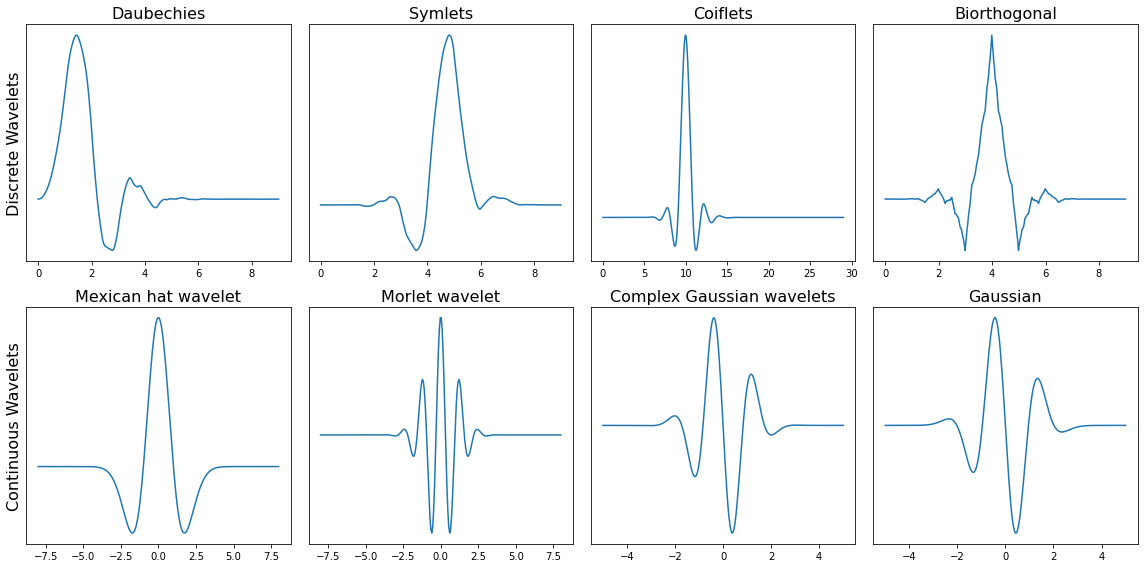

In [15]:
print("Waveles in PyWavelet:", pywt.families(short=False))

#Code below from https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']
 
list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]
 
fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
 
plt.tight_layout()
plt.show()

### Human Activity Recognition Dataset

(Code Examples here from https://towardsdatascience.com/multiple-time-series-classification-by-using-continuous-wavelet-transformation-d29df97c0442)

For the activities below we will be using the **Human Activity Recognition Using Smartphones Dataset**: https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

To best show the power of wavelets, we will be running the Wavelet transform on the HAR dataset. The HAR dataset contains accelerometer and gyroscope measurement data collected from mobile phones and tagged under the human activity that was being done, from *Walking, Walking upstairs, Walking downstairs, Sitting, Standing,* and *Laying*.

Let's load the data set and see what the data looks like for each activity:

<AxesSubplot:title={'center':'Laying'}>

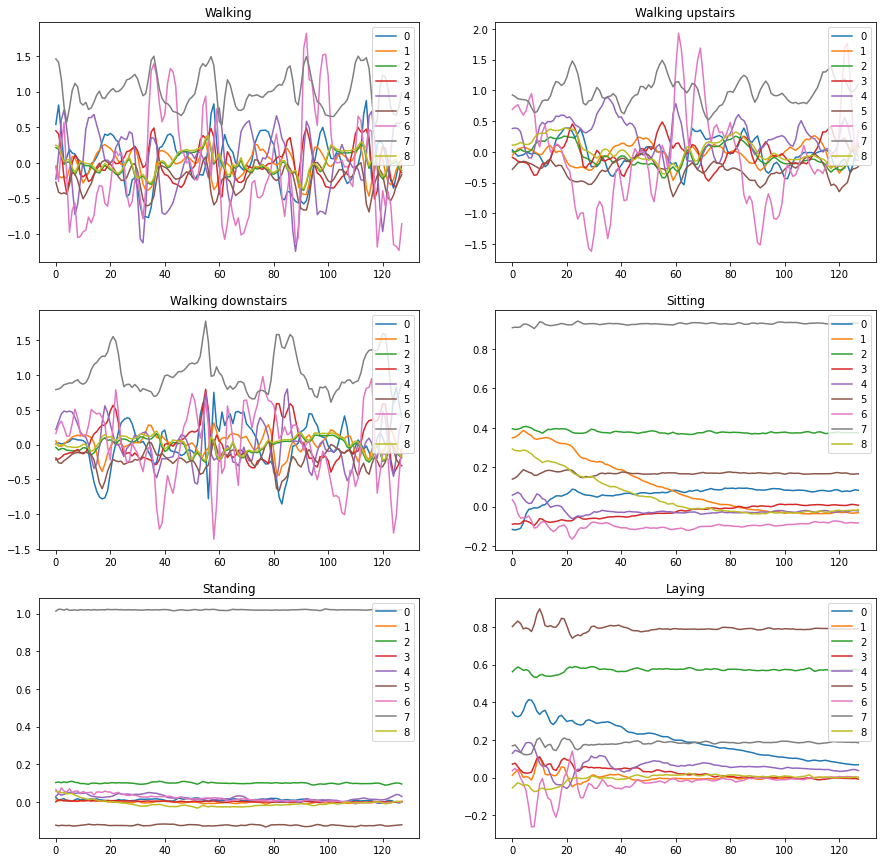

In [16]:
#Code examples from https://towardsdatascience.com/multiple-time-series-classification-by-using-continuous-wavelet-transformation-d29df97c0442

def load_y_data(y_path):
    y = np.loadtxt(y_path, dtype=np.int32).reshape(-1, 1)
    # change labels range from 1-6 t 0-5, this enables a sparse_categorical_crossentropy loss function
    return y - 1


def load_X_data(X_path):
    X_signal_paths = [X_path + file for file in os.listdir(X_path)]
    X_signals = [np.loadtxt(path, dtype=np.float32) for path in X_signal_paths]
    return np.transpose(np.array(X_signals), (1, 2, 0))


PATH = '../../data/UCI HAR Dataset/'
LABEL_NAMES = ["Walking", "Walking upstairs",
               "Walking downstairs", "Sitting", "Standing", "Laying"]

# load X data
X_train = load_X_data(PATH + 'train/Inertial Signals/')
X_test = load_X_data(PATH + 'test/Inertial Signals/')
# load y label
y_train = load_y_data(PATH + 'train/y_train.txt')
y_test = load_y_data(PATH + 'test/y_test.txt')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axe = ax.ravel()

pd.DataFrame(X_train[85]).plot(ax=axe[0], title='Walking')
pd.DataFrame(X_train[150]).plot(ax=axe[1], title='Walking upstairs');
pd.DataFrame(X_train[125]).plot(ax=axe[2], title='Walking downstairs');
pd.DataFrame(X_train[27]).plot(ax=axe[3], title='Sitting')
pd.DataFrame(X_train[0]).plot(ax=axe[4], title='Standing')
pd.DataFrame(X_train[51]).plot(ax=axe[5], title='Laying')

There are clear differences in the measurement values of the different activities, especially between the more strenous (walking) to the less strenough ones (standing).

Let's now run the Wavelet transform on some of this activity and see what comes out. The *PyWavelet* module has the **cwt** function that we can call for this (https://pywavelets.readthedocs.io/en/latest/ref/cwt.html). We are using the Morlet wavelet for the mother wavelet.

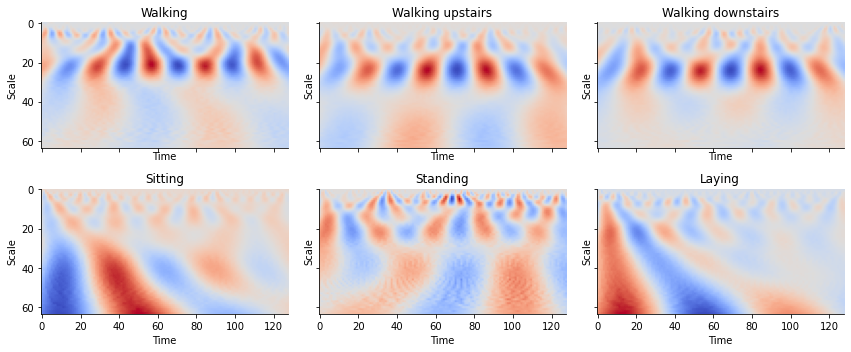

In [17]:
##Code examples from https://towardsdatascience.com/multiple-time-series-classification-by-using-continuous-wavelet-transformation-d29df97c0442


def split_indices_per_label(y):
    indicies_per_label = [[] for x in range(0, 6)]
    # loop over the six labels
    for i in range(6):
        indicies_per_label[i] = np.where(y == i)[0]
    return indicies_per_label


def plot_cwt_coeffs_per_label(X, label_indicies, label_names, signal, sample, scales, wavelet):

    fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True,
                            sharey=True, figsize=(12, 5))

    for ax, indices, name in zip(axs.flat, label_indicies, label_names):
        coeffs, freqs = pywt.cwt(
            X[indices[sample], :, signal], scales, wavelet=wavelet)
        ax.imshow(coeffs, cmap='coolwarm', aspect='auto')
        ax.set_title(name)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_ylabel('Scale')
        ax.set_xlabel('Time')
    plt.tight_layout()


train_labels_indicies = split_indices_per_label(y_train)

# signal indicies: 0 = body acc x, 1 = body acc y, 2 = body acc z, 3 = body gyro x, 4 = body gyro y, 5 = body gyro z, 6 = total acc x, 7 = total acc y, 8 = total acc z
signal = 3  # signal index
sample = 1  # sample index of each label indicies list
scales = np.arange(1, 65)  # range of scales
wavelet = 'morl'  # mother wavelet

plot_cwt_coeffs_per_label(X_train, train_labels_indicies, LABEL_NAMES, signal,
                          sample, scales, wavelet)

We can see different patterns in the resulting wavelets for each activity, both in the time and frequency space.

## Conclusion

We have seen how spectral analysis is a very powerful tool for doing time series analysis. Using the Fourier transform allows us to view the data in the frequency domain which allows for techniques that just aren't possible if only using the time domain. Combined with filtering methods and the Fourier inversion theorem, this allows us to clean up our time series and remove noise. More powerful techniques like the Wavelet transform allows us to continue making use of the frequency domain without having to give up the time domain completely.

## References

* Chapters 1-3 of Priestley, M.B. (1981). Spectral Analysis and Time Series, Vols. 1 and 2, Academic Press, New York.
* https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/
* https://ataspinar.com/2018/04/04/machine-learning-with-signal-processing-techniques/
* https://towardsdatascience.com/multiple-time-series-classification-by-using-continuous-wavelet-transformation-d29df97c0442